In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_read = pd.read_csv('PbPbCE_residue',index_col=0)
    df_read.head()

Loading data from file


In [3]:
df_read

,residue,name,obs,tl_training_n
0,-1.697776,TL,dNch_deta[0 5],47
1,0.450268,TL,dNch_deta[0 5],47
2,0.519453,TL,dNch_deta[0 5],47
3,-1.271797,TL,dNch_deta[0 5],47
4,-2.370533,TL,dNch_deta[0 5],47
...,...,...,...,...
17195,0.135391,GP,v22[60 70],473
17196,-1.190963,GP,v22[60 70],473
17197,-0.333202,GP,v22[60 70],473
17198,0.004432,GP,v22[60 70],473


In [4]:
#sns.set_context("notebook")

In [5]:
#plot=sns.violinplot(data=df_read[df_read["hf_training_n"]==485], y="obs", x="residue", hue = "name", split=True, orient="h")
#plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


In [6]:
# sns.set_context("poster")
# df_read.rename(columns={'tl_training_n':'Target data','residue':'normalized residue'}, inplace=True)
# plot2= sns.displot(df_read, kind="kde", x="normalized residue", col='Target data', row="obs", hue="name",
#                   common_norm=False, facet_kws=dict(margin_titles=True,sharex=False))
# #plot2.set(xlabel='normalized residue')
# #axes = plot2.axes.flatten()
# #for ax in axes:
# #    ax.set_title("Training points from target")

# #plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')





In [7]:
# axes = plot2.fig.axes
# from scipy import stats                                                         
# xx = np.arange(-4, +4, 0.001)                                                   
# yy = stats.norm.pdf(xx)                                                         


In [8]:
# for i, ax in enumerate(axes):
#     sns.lineplot(ax=ax,x=xx, y=yy, label="Standard Normal dist", legend=False, color='red')
# plot2.savefig("PbPbCE_norm_residue.png", dpi=100)
# plot2.fig


#     #plt.legend(loc='upper left', labels=['TL', 'GP','Normal'])

In [9]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_res = pd.read_csv('PbPbCE',index_col=0)
df_res.head()

Loading data from file


,observable,fold,n_training,r2_lin_tl,r2_stand_GP,mse_lin_tl,mse_stand_GP,wn_lin_tl,wn_stand_GP,rho,mse_lin_mf,r2_lin_mf,wn_lin_mf_0,wn_lin_mf_1
0,dNch_deta[0 5],0,47,NaN,0.787819,NaN,0.209274,NaN,0.005870,1.064928,0.024221,0.975443,0.006799,0.002542
1,dNch_deta[0 5],0,94,NaN,0.955956,NaN,0.043440,NaN,0.004212,0.969186,0.023765,0.975905,0.006799,0.002486
2,dNch_deta[0 5],0,141,NaN,0.954007,NaN,0.045363,NaN,0.005101,0.973634,0.022292,0.977398,0.006799,0.002570
3,dNch_deta[0 5],0,188,NaN,0.957924,NaN,0.041499,NaN,0.008265,0.975497,0.022446,0.977242,0.006799,0.002620
4,dNch_deta[0 5],0,235,NaN,0.964245,NaN,0.035265,NaN,0.007005,0.986326,0.021499,0.978203,0.006799,0.002409


In [10]:
df_gp_mse = df_res[['observable','fold','n_training','r2_stand_GP','mse_stand_GP']]
df_gp_mse['name'] = 'GP'
df_gp_mse.rename(columns={'r2_stand_GP':'R2','mse_stand_GP':'MSE'}, inplace=True)
df_gp_mse.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,47,0.787819,0.209274,GP
1,dNch_deta[0 5],0,94,0.955956,0.043440,GP
2,dNch_deta[0 5],0,141,0.954007,0.045363,GP
3,dNch_deta[0 5],0,188,0.957924,0.041499,GP
4,dNch_deta[0 5],0,235,0.964245,0.035265,GP


In [11]:
df_tl_mse = df_res[['observable','fold','n_training','r2_lin_mf','mse_lin_mf']]
df_tl_mse['name'] = 'TL'
df_tl_mse.rename(columns={'r2_lin_mf':'R2','mse_lin_mf':'MSE'}, inplace=True)
df_tl_mse.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,47,0.975443,0.024221,TL
1,dNch_deta[0 5],0,94,0.975905,0.023765,TL
2,dNch_deta[0 5],0,141,0.977398,0.022292,TL
3,dNch_deta[0 5],0,188,0.977242,0.022446,TL
4,dNch_deta[0 5],0,235,0.978203,0.021499,TL


In [12]:
df_all = pd.concat([df_tl_mse,df_gp_mse],axis=0)

In [13]:
df_all.head()

,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,47,0.975443,0.024221,TL
1,dNch_deta[0 5],0,94,0.975905,0.023765,TL
2,dNch_deta[0 5],0,141,0.977398,0.022292,TL
3,dNch_deta[0 5],0,188,0.977242,0.022446,TL
4,dNch_deta[0 5],0,235,0.978203,0.021499,TL


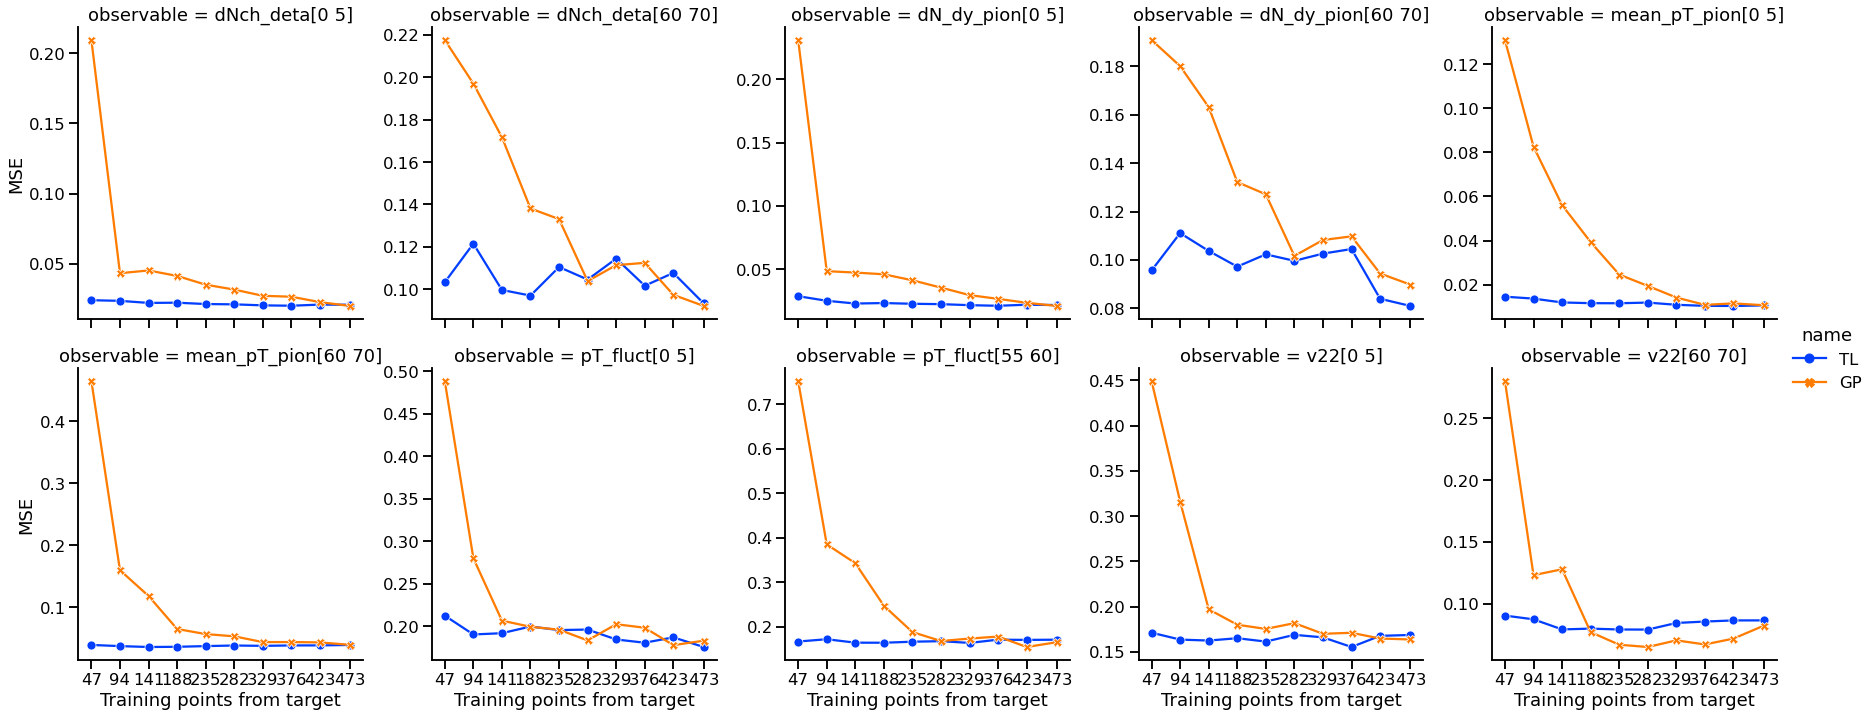

In [14]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",col="observable", kind='line', col_wrap=5,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
#g.set_xticklabels(np.unique(df_all['n_training']),rotation=30)
g.savefig("PbPbCE_all_observables_MSE.png", dpi=100)
#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

In [15]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    #df_small = pd.read_csv('multifidelity_viscous_models_PbPb2760_Grad_CE_small',index_col=0)
    df_small = pd.read_csv('PbPbCE_small',index_col=0)


df_small.head()

Loading data from file


,observable,fold,n_training,r2_lin_tl,r2_stand_GP,mse_lin_tl,mse_stand_GP,wn_lin_tl,wn_stand_GP,rho,mse_lin_mf,r2_lin_mf,wn_lin_mf_0,wn_lin_mf_1
0,dNch_deta[0 5],0,5,NaN,-2.032554,NaN,2.991016,NaN,5.562685e-309,0.909194,0.036171,0.963326,0.0068,5.562685e-309
1,dNch_deta[0 5],0,10,NaN,0.461360,NaN,0.531262,NaN,5.562685e-309,0.852420,0.049078,0.950240,0.0068,5.562685e-309
2,dNch_deta[0 5],0,15,NaN,0.015954,NaN,0.970567,NaN,1.125053e-22,0.880247,0.040500,0.958938,0.0068,5.562685e-309
3,dNch_deta[0 5],0,20,NaN,0.544047,NaN,0.449707,NaN,5.562685e-309,0.925593,0.032528,0.967020,0.0068,5.562685e-309
4,dNch_deta[0 5],0,25,NaN,0.402693,NaN,0.589125,NaN,5.562685e-309,0.925969,0.031666,0.967894,0.0068,5.305142e-32


In [16]:
df_gp_mse_sm = df_small[['observable','fold','n_training','r2_stand_GP','mse_stand_GP']]
df_gp_mse_sm['name'] = 'GP'
df_gp_mse_sm.rename(columns={'r2_stand_GP':'R2','mse_stand_GP':'MSE'}, inplace=True)
df_gp_mse_sm.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,5,-2.032554,2.991016,GP
1,dNch_deta[0 5],0,10,0.461360,0.531262,GP
2,dNch_deta[0 5],0,15,0.015954,0.970567,GP
3,dNch_deta[0 5],0,20,0.544047,0.449707,GP
4,dNch_deta[0 5],0,25,0.402693,0.589125,GP


In [17]:
df_tl_mse_sm = df_small[['observable','fold','n_training','r2_lin_mf','mse_lin_mf']]
df_tl_mse_sm['name'] = 'TL'
df_tl_mse_sm.rename(columns={'r2_lin_mf':'R2','mse_lin_mf':'MSE'}, inplace=True)
df_tl_mse_sm.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,5,0.963326,0.036171,TL
1,dNch_deta[0 5],0,10,0.950240,0.049078,TL
2,dNch_deta[0 5],0,15,0.958938,0.040500,TL
3,dNch_deta[0 5],0,20,0.967020,0.032528,TL
4,dNch_deta[0 5],0,25,0.967894,0.031666,TL


In [18]:
df_all_sm = pd.concat([df_tl_mse_sm,df_gp_mse_sm],axis=0)
df_all_sm.head()

,observable,fold,n_training,R2,MSE,name
0,dNch_deta[0 5],0,5,0.963326,0.036171,TL
1,dNch_deta[0 5],0,10,0.950240,0.049078,TL
2,dNch_deta[0 5],0,15,0.958938,0.040500,TL
3,dNch_deta[0 5],0,20,0.967020,0.032528,TL
4,dNch_deta[0 5],0,25,0.967894,0.031666,TL


In [19]:
cond1 = df_all['name']=='GP'
cond2 = df_all['n_training']==473
red_line = np.mean(df_all.loc[cond1 & cond2]['MSE'])

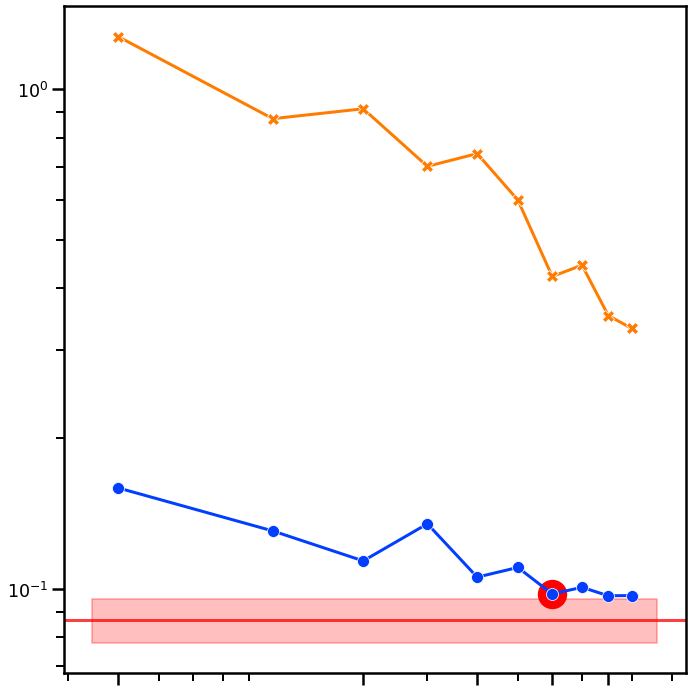

In [20]:
sns.set_context('poster',font_scale=0.8)
line,ax = plt.subplots(figsize=(10,10))
#ax.set_title('Averaged MSE')
ax.axhline(red_line,color='red', alpha=0.5, label='Desired Accuracy')

#s = np.arange(0.0, 10.0, 0.001)

#a = plt.axes([.45, .45, .3, .3])
ax = sns.lineplot(data=df_all_sm.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False, legend=False,ci=None)
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(red_line,color='red', alpha=0.5, label='Desired Accuracy')


for i in [35,235]:

    cond3 = df_all_sm['n_training']==i
    cond4 = df_all_sm['name']=='TL'

    tl_data = np.mean(df_all_sm.loc[cond3 & cond4]['MSE'])
    gp_data = np.mean(df_all_sm.loc[cond1 & cond3]['MSE'])
    if i==35:
        ax.scatter(i,tl_data,c='red',s=3000, marker='.')
    if i== 235:
        ax.scatter(i,gp_data,c='red',s=3000, marker='.')

a,b = ax.get_xbound()
ax.fill_between(x=np.linspace(a,b,50),y1=red_line-red_line*0.10,y2=red_line+red_line*0.10,
               color='red',alpha=0.25)

ax.set(xlabel =None, ylabel = None, xticks=np.arange(5,50,10))
plt.tight_layout()
plt.savefig("PbPbCE_small_n_averaged_MSE.png", dpi=100)

#plt.title('Probability')
#plt.xticks([])
#plt.yticks([])

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


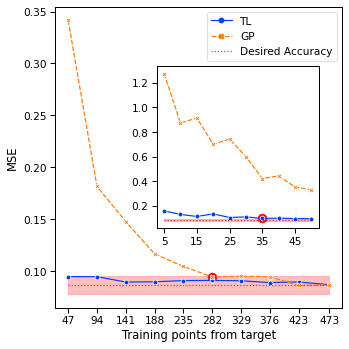

In [22]:
sns.set_context('paper', font_scale=1.2)
line,ax = plt.subplots(figsize=(5,5))
ax = sns.lineplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=True,ci=None)
#ax.set_title('Averaged MSE')
#ax.axhline(red_line,color='red', alpha=0.5, label='Desired Accuracy')
#ax.set_yscale('log')
#ax.set_xscale('log')
for i in [35,282]:

    cond3 = df_all['n_training']==i
    cond4 = df_all['name']=='TL'

    tl_data = np.mean(df_all.loc[cond3 & cond4]['MSE'])
    gp_data = np.mean(df_all.loc[cond1 & cond3]['MSE'])
    if i==35:
        ax.scatter(i,tl_data,c='red',s=300, marker='.')
    if i== 282:
        ax.scatter(i,gp_data,c='red',s=300, marker='.')
        
ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')


#s = np.arange(0.0, 10.0, 0.001)

a = plt.axes([.45, .35, .45, .45])
axmin = sns.lineplot(data=df_all_sm.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=True, legend=False,ci=None)
axmin.plot(np.unique(df_all_sm['n_training']),red_line*np.repeat(1,10), 
        color='red', alpha=0.8, label='Desired Accuracy',
       linestyle='dotted')
axmin.fill_between(x=np.unique(df_all_sm['n_training']),y1=red_line-red_line*0.10,y2=red_line+red_line*0.10,
               color='red',alpha=0.25)

for i in [35,282]:

    cond3 = df_all_sm['n_training']==i
    cond4 = df_all_sm['name']=='TL'

    tl_data = np.mean(df_all_sm.loc[cond3 & cond4]['MSE'])
    gp_data = np.mean(df_all_sm.loc[cond1 & cond3]['MSE'])
    if i==35:
        axmin.scatter(i,tl_data,c='red',s=300, marker='.')
    if i== 282:
        axmin.scatter(i,gp_data,c='red',s=300, marker='.')
        
ax.plot(np.unique(df_all['n_training']),red_line*np.repeat(1,10), 
        color='red', alpha=0.8, label='Desired Accuracy',
       linestyle='dotted')

ax.fill_between(x=np.unique(df_all['n_training']),y1=red_line-red_line*0.10,y2=red_line+red_line*0.10,
               color='red',alpha=0.25)

axmin.set(xlabel =None, ylabel = None, xticks=np.arange(5,50,10))
#axmin.set_yscale('log')
#axmin.set_xscale('log')

ax.legend()
plt.tight_layout()

plt.savefig("PbPbCE_averaged_MSE_paper.png", dpi=100, bbox_inches='tight')

#plt.title('Probability')
#plt.xticks([])
#plt.yticks([])

In [20]:
df_all_comb = pd.concat([df_all,df_all_sm],axis=0)

In [21]:
np.unique(df_all_comb['n_training'])

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  47,  50,  94, 141,
       188, 235, 282, 329, 376, 423, 473])

<IPython.core.display.Javascript object>


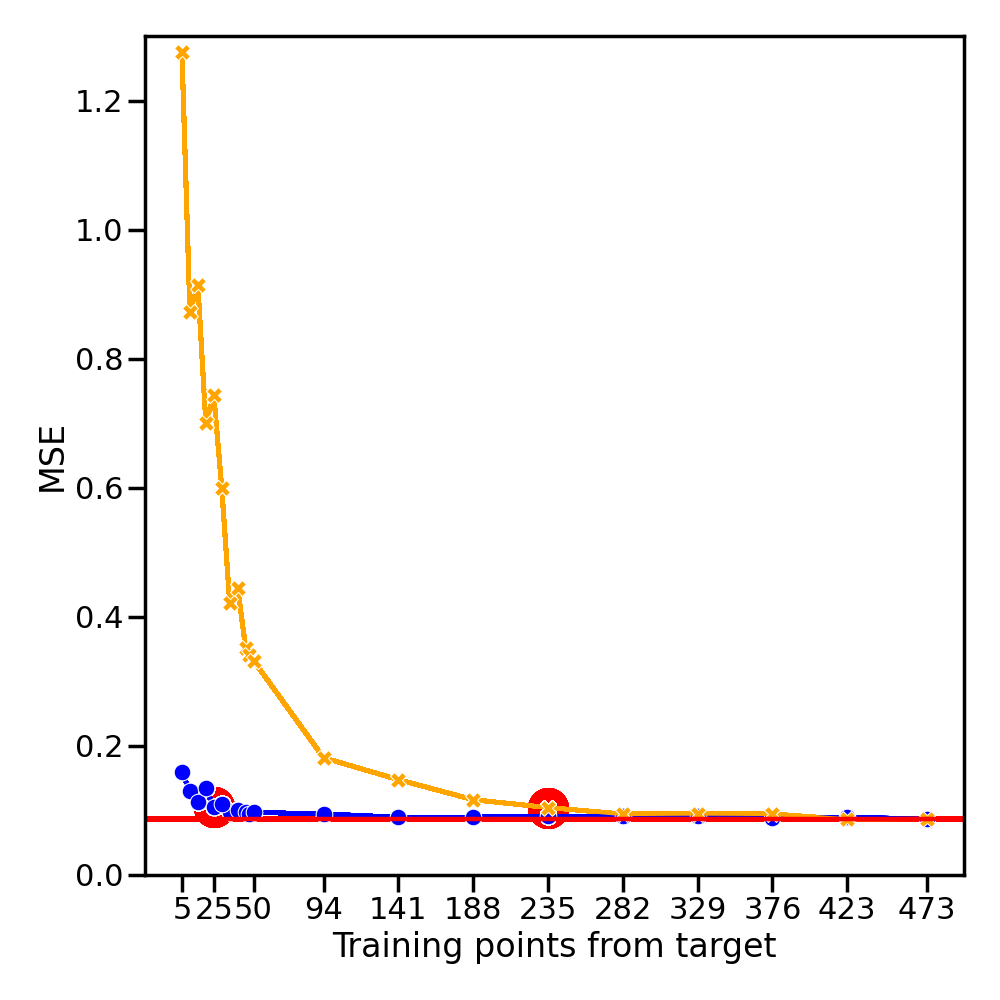

In [35]:
%matplotlib notebook
import matplotlib
sns.set_context('poster')

# color palette as dictionary
palette = {"TL":"blue",
           "GP":"orange"}

fig,ax1 = plt.subplots(figsize=(10,10))
ax1.set(xticks=np.unique(df_all_comb['n_training']), xlabel='Training points from target')
ax1.set_ylim(0,1.3)

def more_events(i):
    new_df = df_all_comb[df_all_comb['n_training']<=i]
    cond1 = df_all_comb['name']=='GP'
    cond2 = df_all_comb['n_training']==473
    cond3 = df_all_comb['n_training']==i
    cond4 = df_all_comb['name']=='TL'
    red_line = np.mean(df_all_comb.loc[cond1 & cond2]['MSE'])
    tl_data = np.mean(df_all_comb.loc[cond3 & cond4]['MSE'])
    gp_data = np.mean(df_all_comb.loc[cond1 & cond3]['MSE'])
    
    #new_df.head()
    ax1.axhline(red_line,color='red', alpha=0.5)
    if i>50:
        g1 = sns.lineplot(data=new_df.drop('R2', axis=1), x="n_training", y="MSE",palette=palette,
                      hue='name', style="name",
                      markers=True, dashes=False, ci=None,legend=False,ax=ax1)
        ticks=np.array([5, 25, 50,  94, 141,188, 235, 282, 329, 376, 423, 473])
        g1.set_xticks(ticks)
        g1.set_xticklabels(ticks)
        plt.tight_layout()
    else:
        g2 = sns.lineplot(data=new_df.drop('R2', axis=1), x="n_training", y="MSE",palette=palette,
                       hue='name', style="name",
                      markers=True, dashes=False, legend=False, ci=None,ax=ax1)
    if i==25:
        ax1.scatter(i,tl_data,c='red',s=3000, marker='.')
    if i== 235:
        ax1.scatter(i,gp_data,c='red',s=3000, marker='.')
    
        

#plt.savefig("AuAuGrad_averaged_MSE.png", dpi=100)
import matplotlib.animation as anim
animator = anim.FuncAnimation(fig, more_events, interval = 10, frames=np.unique(df_all_comb['n_training']))
plt.show()

f = "PbCEanimation_mse.gif" 
writergif = matplotlib.animation.PillowWriter(fps=2) 
animator.save(f, writer=writergif)

In [ ]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue="name",style='name', col="observable", kind='line', col_wrap=5,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
g.savefig("PbPbCE_all_observables_R2.png", dpi=100)

#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

In [ ]:
sns.set_context('poster')
line,ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False)
#ax.set_title('Averaged R2')
ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')

a = plt.axes([.4, .2, .3, .3])
axmin = sns.lineplot(data=df_all_sm.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False, legend=False)
axmin.set(xlabel =None, ylabel = None, xticks=np.unique(df_all_sm['n_training']))
plt.tight_layout()
plt.savefig("PbPbCE_averaged_R2.png", dpi=100)
